# Linear Regression - House Prices MV

### Preprocessing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')

In [2]:
data = {
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3.0, 4.0, float('nan'), 3.0, 5.0],
    'age': [20, 15, 18, 30, 8],
    'price': [550000, 565000, 610000, 595000, 760000]
}

# Create the DataFrame
df = pd.DataFrame(data)
df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      5 non-null      int64  
 1   bedrooms  4 non-null      float64
 2   age       5 non-null      int64  
 3   price     5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [4]:
df.describe()

,area,bedrooms,age,price
count,5.000000,4.000000,5.00000,5.000000
mean,3280.000000,3.750000,18.20000,616000.000000
std,540.370243,0.957427,8.01249,83919.604384
min,2600.000000,3.000000,8.00000,550000.000000
25%,3000.000000,3.000000,15.00000,565000.000000
50%,3200.000000,3.500000,18.00000,595000.000000
75%,3600.000000,4.250000,20.00000,610000.000000
max,4000.000000,5.000000,30.00000,760000.000000


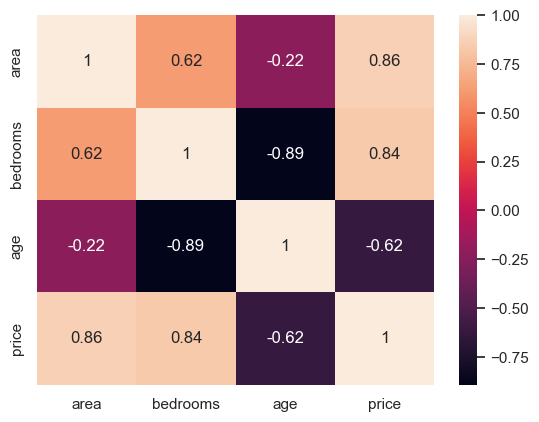

In [5]:
sns.heatmap(df.corr(), annot=True)
plt.show()

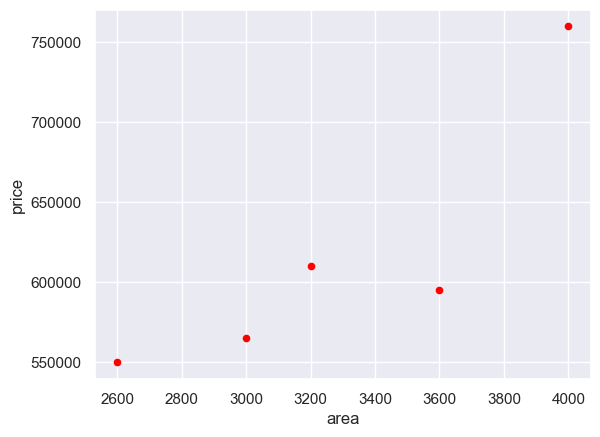

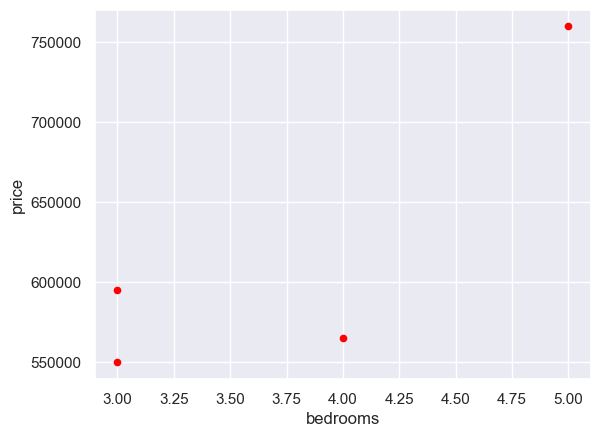

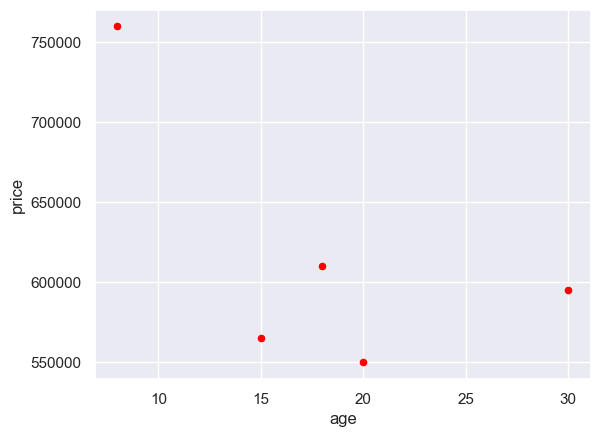

In [6]:
for x in df.columns[:-1]:
    df.plot.scatter(x, 'price', color='red')
    plt.show()

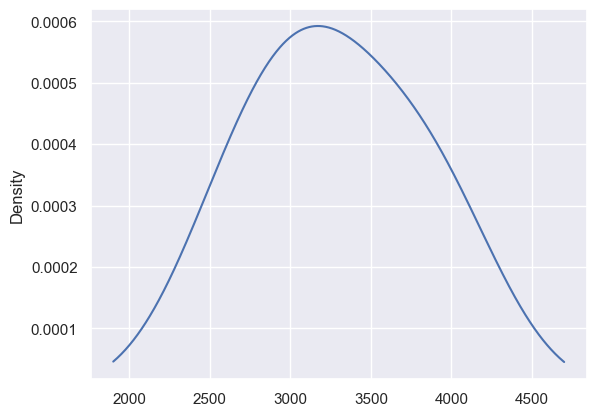

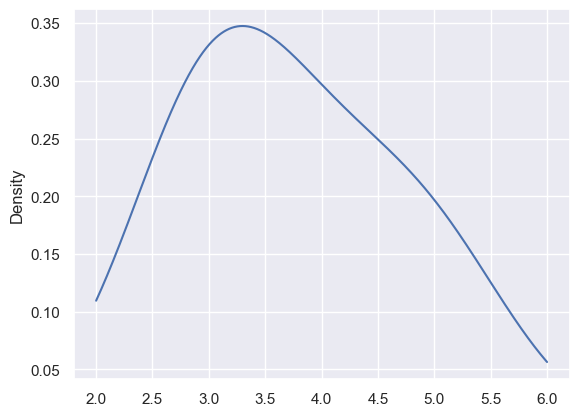

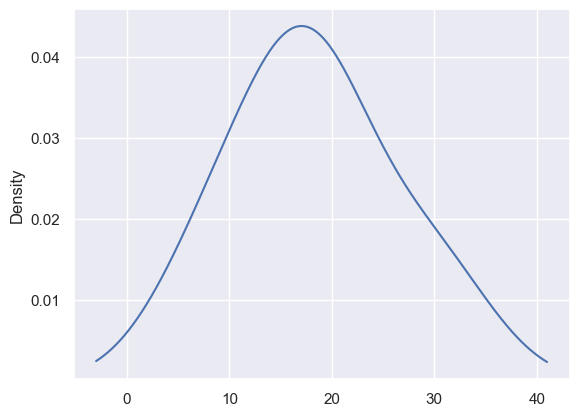

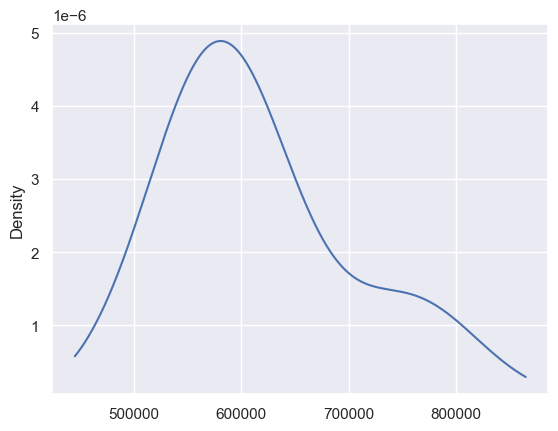

In [7]:
for x in df.columns:
    df[x].plot.density()
    plt.show()

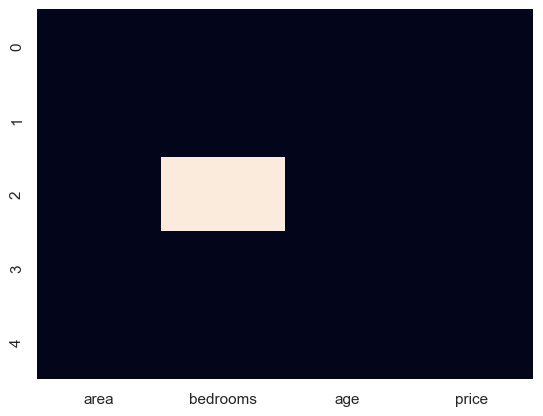

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
df['bedrooms'] = df['bedrooms'].fillna(
  df['bedrooms'].median()
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      5 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       5 non-null      int64  
 3   price     5 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 292.0 bytes


In [10]:
X_train = df.drop('price', axis=1)
y_train = df['price']

### Modelling

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
model.coef_, model.intercept_

(array([    198.47159002, -116583.73881651,  -14267.77585936]),
 656046.539004866)

### Evaluation